In [29]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
import nltk 
import numpy as np
import pandas as pd
import tika

import seaborn as sns, numpy as np
from matplotlib import pyplot as plt

from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models.word2vec import Text8Corpus

from importlib import reload

from nltk.tokenize import word_tokenize

from spacy.lang.en import English
import spacy
from spacy import displacy
from collections import Counter

from gensim.summarization import summarize

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [30]:
reload(pdf2text)
dataset = pdf2text.get_dataset()

2019-07-06 13:45:57,201 [MainThread  ] [WARNI]  Tika server returned status: 415
2019-07-06 13:45:58,617 [MainThread  ] [WARNI]  Tika server returned status: 422


## Clean the data

In [31]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to /Users/Polina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Polina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Polina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Polina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Cleaning: bitcoin
Cleaning: KwattCoin
Cleaning: AdCoin
Cleaning: Budbo
Cleaning: oceanprotocol
Done!


## Spacy - Entity Detection

In [60]:
def entity_det (paper):
    
    nlp = spacy.load('en_core_web_sm')
    doc1 = nlp(dataset[paper])
    doc2 = nlp(dataset['bitcoin'])
    items1 = [x.label_ for x in doc1.ents]
    items2 = [x.label_ for x in doc2.ents]
    i1 = Counter(items1).most_common(10)
    #print('\n')
    i2 = Counter(items2).most_common(10)

    x1 = []
    y1 = []

    x2 = []
    y2 = []

    for i in range(len(i1)):
        x1.append(i1[i][0])
        y1.append(i1[i][1])


    for i in range(len(i2)):
        x2.append(i2[i][0])
        y2.append(i2[i][1])
    
    plt.subplots_adjust(hspace = 0.5, top = 0.4)
    plt.figure(figsize=(12,5))

    plt.subplot(211)
    plt.plot(x1, y1)
    plt.title("Chosen protocol")

    plt.subplot(212)
  #  plt.figure(figsize=(12,5))
    plt.plot(x2, y2)
    plt.title("Bitcoin")
    plt.show()

<Figure size 432x288 with 0 Axes>

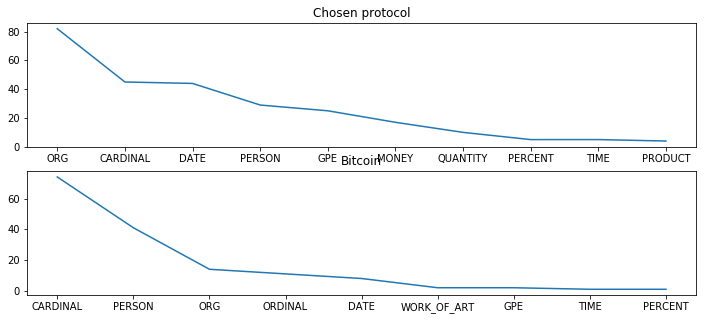

In [61]:
#put the name of the white paper here
#visualized in a wrong way
entity_det('KwattCoin')

## Word2Vec

In [27]:
def wordvec(word, protocol):

    tokens = []
    for k in corpora.keys():
        tokens.append(word_tokenize(corpora[k]))

    n = 0    
    for i in enumerate(corpora.items()):
        if i[1][0] == protocol:
            n = i[0]
        else: continue

    model1 = Word2Vec(tokens[:], size =100, window=5, min_count=1, workers=2)
    
    #most similar word, based on the whole corpus
    l = model1.wv.most_similar([word])
    x = []
    y = []

    for i in range(len(l)):
        x.append(l[i][0])
        y.append(l[i][1])

    #grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    #plt.subplot(grid[0, 0])   
    plt.plot(x, y)
    plt.show()
    
    
    #similarities in the exact protocol
    model = Word2Vec(tokens[n], size =100, window=5, min_count=1, workers=2)

    X = model[model.wv.vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    #plt.subplot(grid[1, 0])
    plt.figure(figsize=(10,10))
    pyplot.scatter(result[:,0], result[:,1], s=100)
    words = list(model.wv.vocab)

    for i, word in enumerate(tokens[n][:]):
        pyplot.annotate(word, xy=(result[i,0], result[i,1]), size = 10)
    pyplot.show()

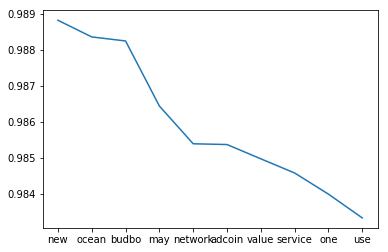

IndexError: index 26 is out of bounds for axis 0 with size 26

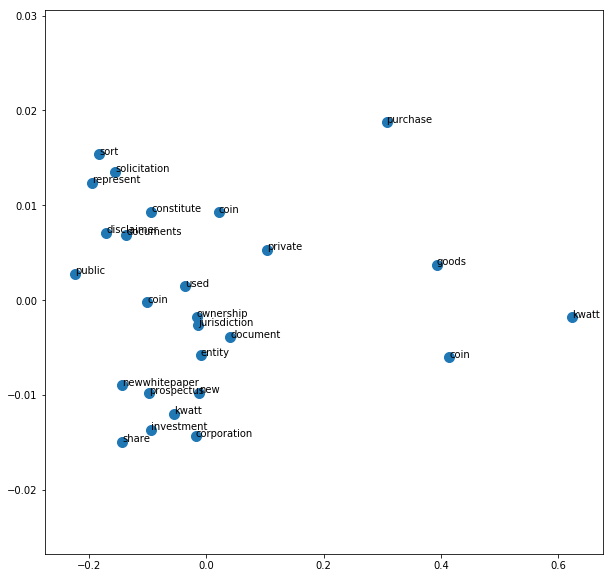

In [28]:
#1st input - word, for which you want to find some similarities
#2nd input - chosen whitepaper to see the most closest (similar) words in this whitepaper
wordvec("data", "KwattCoin")

## Text Summarization

In [19]:
def summ(protocol):
    text = dataset[protocol]
    print(summarize(text))

In [20]:
#put the name of the protocol here to see the summarized version of whitepaper
summ("oceanprotocol")

A Decentralized Substrate for AI Data & Services 
Ocean is a decentralized protocol and network of artificial 
intelligence (AI) data/services.
It helps power marketplaces to buy/sell AI data & services, software to publish 
orchestration: at its core are decentralized service agreements and decentralized access control, 
On that, Ocean adds network rewards to incentivize data sharing, 
including privacy-preserving data commons.
This Technical Whitepaper is intended to accompany the Information Memorandum for the Token Distribution Details published by 
Our aim is to spread the benefits of AI by equalizing the opportunity to access data.
can be used as a foundational substrate to power a new ecosystem of data marketplaces, and more 
Can it reward relevant data over spam?
To answer the first two questions above, Ocean has functionality to reconcile spread of data with 
It has infrastructure for service agreements and access control, which 
allows compute to be brought to the data.
It ha